In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
train_images.shape, train_images_with_noise_channels.shape

((60000, 784), (60000, 1568))

In [3]:
train_images_with_noise_channels[0], train_images_with_zeros_channels[0]

(array([0.        , 0.        , 0.        , ..., 0.08596036, 0.84853208,
        0.48569757]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
        ])
    model.compile(optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    return model
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)



Epoch 1/10


375/375 [==============================] - 4s 9ms/step - loss: 0.6211 - accuracy: 0.8154 - val_loss: 0.4591 - val_accuracy: 0.8573
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.2575 - accuracy: 0.9193 - val_loss: 0.2059 - val_accuracy: 0.9403
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1683 - accuracy: 0.9479 - val_loss: 0.1668 - val_accuracy: 0.9508
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1205 - accuracy: 0.9624 - val_loss: 0.1231 - val_accuracy: 0.9633
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0884 - accuracy: 0.9722 - val_loss: 0.1675 - val_accuracy: 0.9521
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0647 - accuracy: 0.9788 - val_loss: 0.1310 - val_accuracy: 0.9620
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0491 - accuracy: 0.9841 - val_loss: 0.1284 - val_accuracy: 0.9633
E

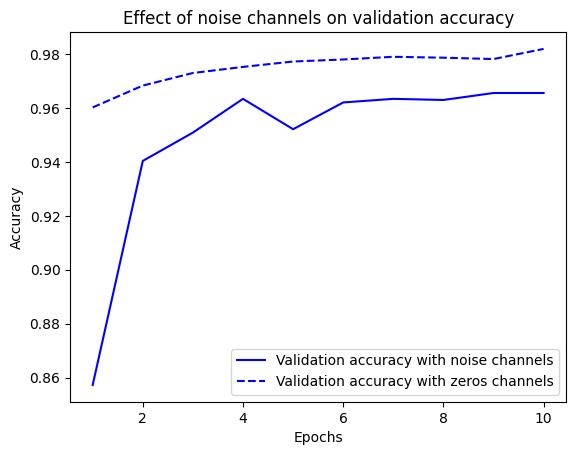

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 2.3158 - accuracy: 0.1010 - val_loss: 2.3058 - val_accuracy: 0.1043
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2996 - accuracy: 0.1164 - val_loss: 2.3128 - val_accuracy: 0.0993
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2925 - accuracy: 0.1240 - val_loss: 2.3190 - val_accuracy: 0.0995
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2808 - accuracy: 0.1370 - val_loss: 2.3252 - val_accuracy: 0.0984
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2654 - accuracy: 0.1495 - val_loss: 2.3395 - val_accuracy: 0.0974
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2461 - accuracy: 0.1631 - val_loss: 2.3467 - val_accuracy: 0.0951
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2239 - accuracy: 0.1776 - val_loss: 2.3672 - val_accuracy: 0.1007